In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
import cv2 as cv

# function imports
from PIL import Image
from skimage.segmentation import watershed
from scipy import ndimage as ndi
from skimage.feature import peak_local_max


[  0 255] (506, 507)


1591200

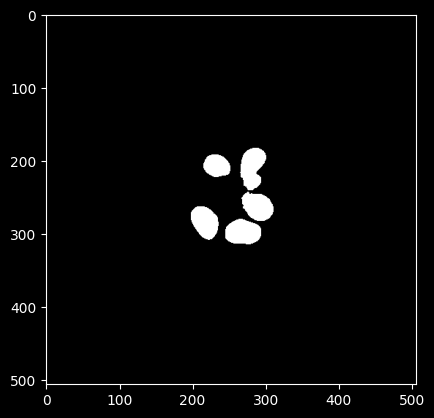

In [2]:
image = Image.open("../pennycress_pods/test/test.png")
image = np.array(image)
print(np.unique(image), image.shape)
plt.imshow(image, cmap='gray')

image.sum()

In [3]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(image,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.6*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)





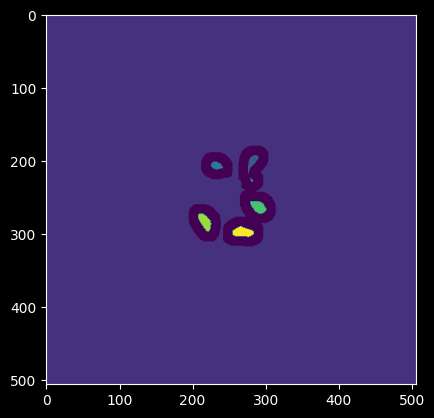

In [4]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

#plot markers
markers_to_plot = markers
plt.imshow(markers)

In [5]:
rgb = cv.cvtColor(image,cv.COLOR_GRAY2BGR)

markers = cv.watershed(rgb, markers)
rgb[markers == -1] = [255,0,0]

seed count: 6


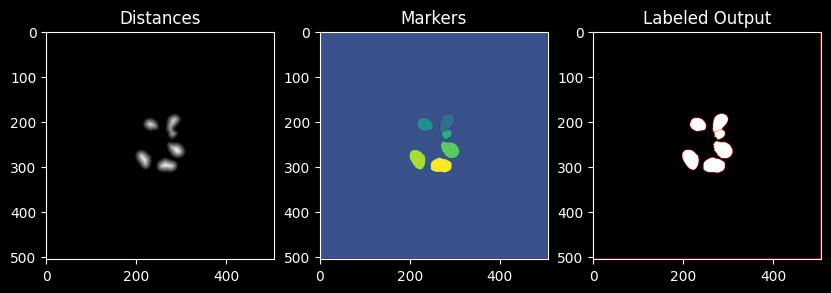

In [6]:


# plot fg, bg, unknown, distances, markers, and labeled output
fix, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(dist_transform, cmap="gray")
ax[0].set_title("Distances")

ax[1].imshow(markers_to_plot)
ax[1].set_title("Markers")

ax[2].imshow(rgb)
ax[2].set_title("Labeled Output")

seed_count = len(np.unique(markers)) - 2

print("seed count:", seed_count)